In [7]:
!git clone https://github.com/SparklePh/KMITL-Workshop-yolo-car-counting

Cloning into 'KMITL-Workshop-yolo-car-counting'...
remote: Enumerating objects: 2701, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 2701 (delta 2), reused 11 (delta 1), pack-reused 2688 (from 2)
Receiving objects: 100% (2701/2701), 196.25 MiB | 26.15 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Updating files: 100% (6113/6113), done.


In [8]:
%cd KMITL-Workshop-yolo-car-counting

/content/KMITL-Workshop-yolo-car-counting/KMITL-Workshop-yolo-car-counting


# Import libraries

In [9]:
!pip install scikit-learn

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load data

In [11]:
#loading dataset
df = pd.read_csv("data/diabetes_dataset.csv")

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Features & target

In [13]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split train-test & scale features

In [14]:
# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Train Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Train Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate models

In [18]:
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Decision Tree
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Random Forest
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Logistic Regression ===
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

=== Decision Tree ===
Accuracy: 0.7922077922077922
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       100
           1       0.70      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154

=== Random Forest ===
Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy           

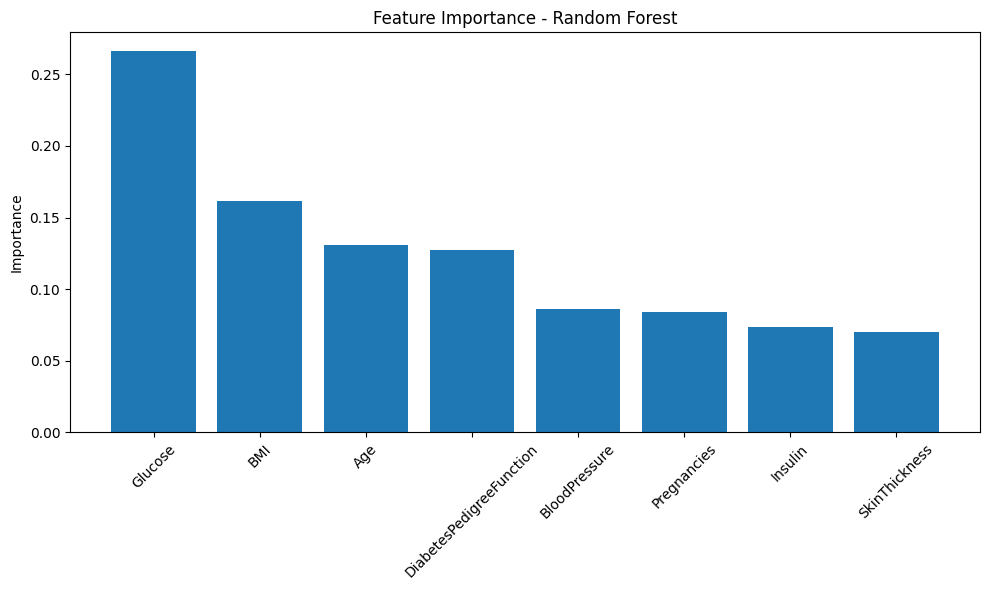

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# เลือกโมเดลที่ใช้ feature importance (Decision Tree หรือ Random Forest)
model_for_importance = rf  # ใช้ Random Forest

# ดึงค่า feature importance
importances = model_for_importance.feature_importances_
features = X.columns

# จัดเรียงจากมากไปน้อย
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=45)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
